In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg


--2020-12-14 14:45:17--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Golden_Gate_Bridge_from_Battery_Spencer.jpg/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58102 (57K) [image/jpeg]
Saving to: ‘640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg’

640px-Golden_Gate_B 100%[===================>]  56.74K  --.-KB/s    in 0.03s   

2020-12-14 14:45:17 (1.96 MB/s) - ‘640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg’ saved [58102/58102]



In [ ]:
!ls

640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg  sample_data


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import  ResNet50, preprocess_input, decode_predictions

In [ ]:
vgg=ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=True)
vgg.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
middle_layer=vgg.get_layer('conv5_block3_out')
model=Model(inputs=vgg.input, outputs=middle_layer.output)
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [ ]:
final_dense=vgg.get_layer("predictions")
W=final_dense.get_weights()[0]


In [ ]:
import numpy as np
img=image.load_img("640px-Golden_Gate_Bridge_from_Battery_Spencer.jpg", target_size=(224, 224))
x=preprocess_input(np.expand_dims(img, 0))
fmaps=model.predict(x)[0]

(1, 360, 360, 3)


In [ ]:
probs=vgg.predict(x)
classnames=decode_predictions(probs)[0]
classnames[0][1]
pred=np.argmax(probs[0])

In [ ]:
w=W[:, pred]

In [ ]:
print(w.shape, fmaps.shape)

(2048,) (7, 7, 2048)


In [ ]:
cam=fmaps.dot(w)

In [ ]:
import scipy as sp
cam=sp.ndimage.zoom(cam, (32, 32), order=1)

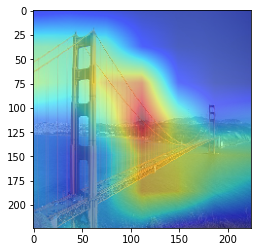

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(img, alpha=0.8)
plt.imshow(cam, cmap='jet', alpha=0.5)